**Importing libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

**Load dataset** 




In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', 
                          with_info=True, 
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCS62IJ/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCS62IJ/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
print(dataset)

{Split('train'): <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [ ]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)
# train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 17),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(17)),
    
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 17)          139145    
                                                                 
 bidirectional (Bidirectiona  (None, 34)               4760      
 l)                                                              
                                                                 
 dense (Dense)               (None, 17)                595       
                                                                 
 dense_1 (Dense)             (None, 1)                 18        
                                                                 
Total params: 144,518
Trainable params: 144,518
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
metrics = ['accuracy'])



In [ ]:
history = model.fit(train_dataset, 
                    epochs = 10, 
                    validation_data = test_dataset, 
                    validation_steps = 30)


Epoch 1/10
391/391 [==============================] - 411s 1s/step - loss: 0.5232 - accuracy: 0.7154 - val_loss: 0.4140 - val_accuracy: 0.8245
Epoch 2/10
391/391 [==============================] - 402s 1s/step - loss: 0.3137 - accuracy: 0.8761 - val_loss: 0.3525 - val_accuracy: 0.8375
Epoch 3/10
391/391 [==============================] - 398s 1s/step - loss: 0.2673 - accuracy: 0.8965 - val_loss: 0.3829 - val_accuracy: 0.8422
Epoch 4/10
391/391 [==============================] - 399s 1s/step - loss: 0.2128 - accuracy: 0.9202 - val_loss: 0.3651 - val_accuracy: 0.8417
Epoch 5/10
391/391 [==============================] - 401s 1s/step - loss: 0.1757 - accuracy: 0.9370 - val_loss: 0.3865 - val_accuracy: 0.8427
Epoch 6/10
391/391 [==============================] - 404s 1s/step - loss: 0.2218 - accuracy: 0.9192 - val_loss: 0.4471 - val_accuracy: 0.8354
Epoch 7/10
391/391 [==============================] - 400s 1s/step - loss: 0.1641 - accuracy: 0.9406 - val_loss: 0.4555 - val_accuracy: 0.8432

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))



In [ ]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  print("Prediction Score: ", predictions)
  
  output = ""
  if predictions[0][0] >= 0.5: output = "POSITIVE"
  elif predictions[0][0] <= -1: output = "NEGATIVE"
  else: output = "NEUTRAL"

  return output



In [ ]:
sample_pred_text = ('The movie was not good. 
                   The animation and the graphics were terrible. 
                    I would not recommend this movie.')

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 1s 861ms/step
Prediction Score:  [[-2.4230275]]
NEGATIVE


In [ ]:
sample_pred_text = ('What an excellent performance')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 1s 765ms/step
Prediction Score:  [[1.3478503]]
POSITIVE


In [ ]:
sample_pred_text = ('This movie was so so. 
                     The acting was medicore. Kind of recommend')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 19ms/step
Prediction Score:  [[-0.502592]]
NEUTRAL


In [ ]:
# AMAZON  REVIEWS : 8 STAR COMMENT OUT OF 10 STAR
sample_pred_text = ("""Lucifer is a great show, a lot of it is the charming and amusing devil we all love to see. 
The strength of this show is the balance it strikes between the detective work and the biblical/divine elements. 
The greatest punch is delivered when one drives the other. 
Lucifer made a strong start and I think the first seasons were it's best. 
Low points include too much of the detective work and less biblical elements, it then resembles CSI more and more. 
You don't want another detective show. Less time should also be devoted to side characters like Maze. 
They are often used as space fillers for no good reason, characters should appear when needed. Overall not too bad. I hope there are more episodes.""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 28ms/step
Prediction Score:  [[5.09613]]
POSITIVE


In [ ]:
# AVENGERS: ENDGAME 3 STAR COMMENT

sample_pred_text = ("""Overrated Sequel, But Still Good, But Violent! Beloved characters die,
                      a character gets their head cut off, someone falls off a cliff, stabbings, 
                      punching, shooting, and more. The characters swear a bit. Even Captain 
                      America does! Role models include, Captain America, Iron Man, Hulk, AntMan, 
                      Black Widow, Hawkeye. Thor not so much because he SPOILER ALERT: got fat 
                      and played Fortnite the entire 5 year period. He was funny, but you may 
                      not want your kid wanting to say 'I want to be like the God of Thunder 
                      and play fortnite all day'.Characters did kiss. Thor drank a lot of beer.
                      Captain America proved himself of something but not saying what. With 
                      reviewing the movie, the first half hour was good, then the next half 
                      hour was slow. The second half hour was pretty good, but the last hourwas epic. 
                      From just starting out with Iron Man, Cap, Thor, and Hulk, to this amazing fight 
                      scene at the end, Avengers Endgame really pulled it off. Overall, pretty good for  
                      families and a good finale for the Infinity Saga.""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 33ms/step
Prediction Score:  [[-1.7649499]]
NEGATIVE


In [ ]:
# IMDB REVIEWS : 10 STAR COMMENT OUT OF 10 STAR
sample_pred_text = ("""Movies really good no any lag in my point of and there is no spoilers in my content. 
Dhanush acting is really external performance and others actors like their childrens actress and also Selva raghavan. 
BGM is mass yuvan Shankar Raja is really super work. And this is my honest review so only I give 10 out of 10 to this movie. 
Watch the movie and support really superb and supernatural movie for all type audience. Don't miss this movie and this is a 
magical combo of Tamil cinema . The sea motography is really super and also the location is also match to this movie. 
Songs are really good the one man show is Dhanush really her character is extremely playing in this movie dual role does 
not similar to either of characters""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 31ms/step
Prediction Score:  [[2.2762315]]
POSITIVE


In [ ]:
# AMAZON REVIEWS : 4 STAR COMMENT OUT OF 10 STAR
sample_pred_text = ("""""Lucifer should have stayed dead.
John6Daniels20 March 2021
Its just a show the glorifies being a bad person.

Lucifer is hash TV. It go can'd because it was hash then they resurrect her and its still hash.

Overall good quality alone can't save this show.

What can be learned? To glorify negativity.

Verdict: I ain't no Christian but this show is Hell bound...Again... """"")
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)


1/1 [==============================] - 0s 27ms/step
Prediction Score:  [[4.6812925]]
POSITIVE


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

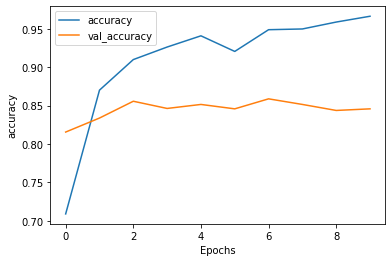

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history, 'accuracy')




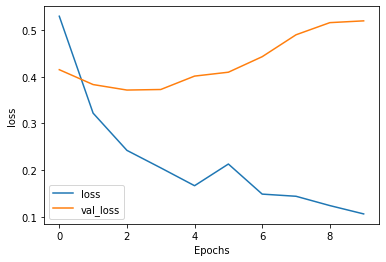

In [ ]:
plot_graphs(history, 'loss')